# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
np.random.seed(0)

titanic = pd.read_csv('Titanic.csv')

In [3]:
titanic.head()

,last,first,gender,age,class,fare,embarked,survived
0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no


In [4]:
titanic = titanic.drop(['last','first'], axis = 1)
titanic.head()

,gender,age,class,fare,embarked,survived
0,M,22.0,3,7.2500,Southampton,no
1,F,38.0,1,71.2833,Cherbourg,yes
2,F,26.0,3,7.9250,Southampton,yes
3,F,35.0,1,53.1000,Southampton,yes
4,M,35.0,3,8.0500,Southampton,no


In [6]:
from sklearn import preprocessing

titanic = pd.get_dummies(titanic, columns=['gender', 'class', 'embarked'])
titanic.head()

,age,fare,survived,gender_F,gender_M,class_1,class_2,class_3,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,22.0,7.2500,no,0,1,0,0,1,0,0,1
1,38.0,71.2833,yes,1,0,1,0,0,1,0,0
2,26.0,7.9250,yes,1,0,0,0,1,0,0,1
3,35.0,53.1000,yes,1,0,1,0,0,0,0,1
4,35.0,8.0500,no,0,1,0,0,1,0,0,1


In [8]:
encode = preprocessing.LabelEncoder()
titanic['survived']=encode.fit_transform(titanic['survived'])
titanic.head()

,age,fare,survived,gender_F,gender_M,class_1,class_2,class_3,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
0,22.0,7.2500,0,0,1,0,0,1,0,0,1
1,38.0,71.2833,1,1,0,1,0,0,1,0,0
2,26.0,7.9250,1,1,0,0,0,1,0,0,1
3,35.0,53.1000,1,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,0,1,0,0,1


In [9]:
titanic.isnull().sum()

age                     177
fare                      0
survived                  0
gender_F                  0
gender_M                  0
class_1                   0
class_2                   0
class_3                   0
embarked_Cherbourg        0
embarked_Queenstown       0
embarked_Southampton      0
dtype: int64

In [10]:
titanic = titanic.fillna(titanic.mean())
titanic.isnull().sum()

age                     0
fare                    0
survived                0
gender_F                0
gender_M                0
class_1                 0
class_2                 0
class_3                 0
embarked_Cherbourg      0
embarked_Queenstown     0
embarked_Southampton    0
dtype: int64

# Split data to Train - Test set

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size = 0.3, train_size = 0.7, random_state = 0)

In [13]:
Y_train = train['survived']
Y_test = test['survived']
X_train = train.drop(['survived'], axis = 1)
X_test = test.drop (['survived'], axis = 1)

In [14]:
X_train.head()

,age,fare,gender_F,gender_M,class_1,class_2,class_3,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton
857,51.000000,26.5500,0,1,1,0,0,0,0,1
52,49.000000,76.7292,1,0,1,0,0,1,0,0
386,1.000000,46.9000,0,1,0,0,1,0,0,1
124,54.000000,77.2875,0,1,1,0,0,0,0,1
578,29.699118,14.4583,1,0,0,0,1,1,0,0


# K Means

In [15]:
from sklearn.cluster import KMeans

np.random.seed(0)

ktest = KMeans(n_clusters=2, random_state= 0)
ktest.fit(titanic)

KMeans(n_clusters=2, random_state=0)

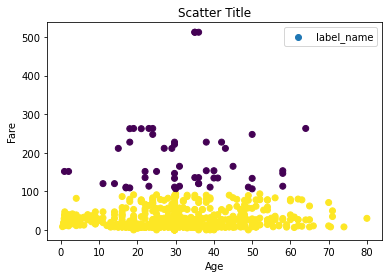

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

col = ktest.predict(titanic)
x = titanic['age']
y = titanic ['fare']

plt.scatter (x, y, c = col, label = "label_name")

plt.xlabel ('Age')
plt.ylabel ('Fare')

plt.title ('Scatter Title')
plt.legend()
plt.show()